In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

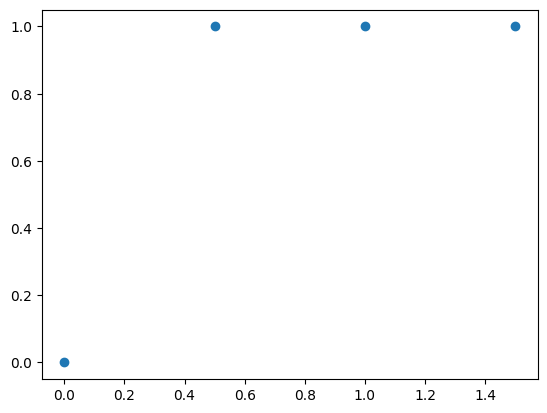

In [2]:
X = np.array([0, 0.5, 1, 1.5])
y = np.array([0, 1, 1, 1])

plt.scatter(X, y)

In [3]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.l1 = nn.Linear(1, 1)
        self.l2 = nn.Linear(1, 1)
        self.l3 = nn.Linear(2, 1)
        
    def forward(self, x):
        out1 = F.relu(self.l1(x))
        out2 = F.relu(self.l1(x))
        
        out = self.l3(torch.tensor([out1, out2]))
        out = F.sigmoid(out)
        
        return out
    
m = LinearRegression()

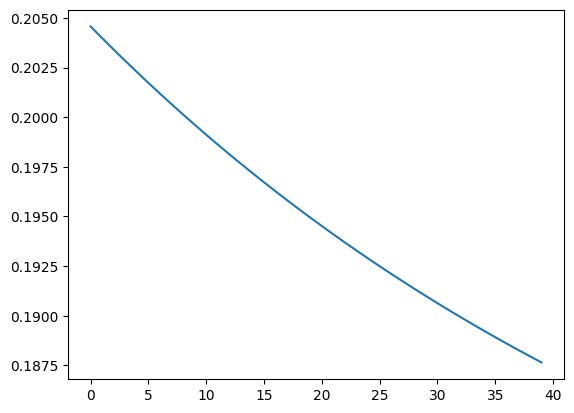

In [4]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(m.parameters(), lr=0.01)

def train_model():
    losses = []
    
    m.train()
    for epoch in range(40):
        total_loss = 0
        for i in range(len(X)):
            target = X[i].astype(np.float32)
            label = y[i].astype(np.float32)
            
            pred = m(torch.tensor([target]))
            loss = loss_fn(pred, torch.tensor([label]))
            
            total_loss += float(loss)
            
            loss.backward()
            
        losses.append(total_loss / len(X))
        optimizer.step()
        optimizer.zero_grad()
    
    plt.plot(losses)
        
train_model()

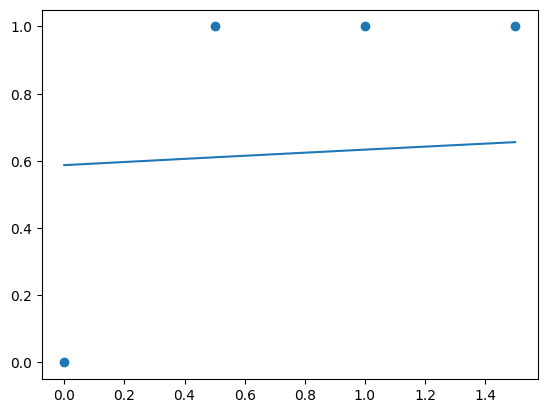

In [5]:
plt.scatter(X, y)
with torch.no_grad():
    preds = np.array([])
    for i in range(len(X)):
        target = X[i].astype(np.float32)
        pred = m(torch.tensor([target]))
        
        preds = np.append(preds, pred.detach())
        
    plt.plot(X, preds)

In [6]:
with torch.no_grad():
    x = torch.tensor([.1])
    print(m(x))

tensor([0.5920])
